In [1]:
import gspread as gs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [13]:
sa = gs.service_account(filename="enhanced-victor-363219-68e4353f5f23.json")
sheet = sa.open("Untitled form (Responses)")
work_sheet = sheet.worksheet("Form Responses 1")
df = pd.DataFrame(work_sheet.get_all_records())
df.head()

,Timestamp,sessionID,a score,b score,time elapse,"who caused death, 0 for left player, 1 for right, -1 none",death reason,level,"true for pass level, false for died",arrive check point time array,coin get time array
0,,,,,,,,,,,
1,,,,,,,,,,,
2,,,,,,,,,,,
3,,,,,,,,,,,
4,,,,,,,,,,,


In [25]:
df['coin get time array'].unique()

array(['', 0, 800300038000, 802003700000, 126191832390000, 37000000000,
       121000000000, 59170000000, 50000000, 79000000, 58700000,
       48171320190000, 370000000000, 3107000000000, 410714018000000,
       2107000000000, 51010000000000, 28511015000000, 3119000000000,
       412816020000000, 285000000000, 310714281842044000, 11509015000000,
       84000000000, 38512016000000, 730700000000, 300000000000,
       101602200000000, 4961301727035000, 125160002703104846,
       89161100000000, 49613311945784784121118, 38171022260430000,
       70800000000, 18303404300, 120242803300, 824001233000000,
       3165082524000000, 26310000000000, 9132818020000000, 690000000000,
       5000000000, 242100260000000, 33240000000000], dtype=object)

In [15]:
df['time elapse'] = pd.to_numeric(df['time elapse'])
df['a score'] = pd.to_numeric(df['a score'])
df['b score'] = pd.to_numeric(df['b score'])
df=df[df['time elapse'] <= 600]
df1 = df.dropna()
df1

,Timestamp,sessionID,a score,b score,time elapse,"who caused death, 0 for left player, 1 for right, -1 none",death reason,level,"true for pass level, false for died",arrive check point time array,coin get time array
23,9/21/2022 4:49:24,637993325496660845,0.0,0.0,14.0,,,,,,
24,9/21/2022 4:53:44,637993328050186794,0.0,0.0,18.0,,,,,,
25,9/21/2022 4:54:08,637993328438416579,0.0,0.0,4.0,,,,,,
26,9/21/2022 4:55:31,637993329096890637,3.0,0.0,21.0,,,,,,
27,9/21/2022 5:03:50,637993334216644963,0.0,0.0,8.0,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
474,10/10/2022 2:23:24,638009653698047585,0.0,1.0,35.0,0,Fall,Level3,FALSE,0,300000000000
475,10/10/2022 2:23:24,638009653698047585,0.0,1.0,35.0,0,Fall,Level3,FALSE,0,300000000000
476,10/10/2022 2:23:59,638009654086727990,2.0,1.0,31.0,0,Fall,Level3,FALSE,27000000000,242100260000000
477,10/10/2022 2:26:37,638009655594063566,1.0,1.0,37.0,1,Fall,Level3,FALSE,30000000000,33240000000000


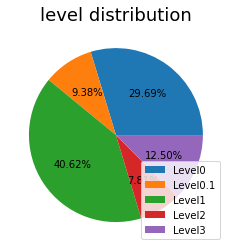

In [28]:

level=df1[df1['level']!='']
df2 = level.groupby(['level']).size()
plt.title("level distribution",fontsize=18)
patches, text1, text2 = plt.pie(df2, autopct=lambda p: '{:.2f}%'.format(p,(p/100)*df2.sum()))
plt.legend(patches, df2.index, loc="lower right")
plt.show()

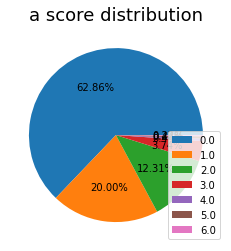

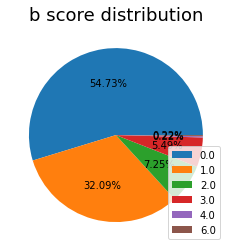

In [47]:
    for i in (['a score', 'b score']):
        #level = df1[df1['level']==j]
        df2 = df1.groupby([i]).size()
        plt.title(i + " distribution",fontsize=18)
        patches, text1, text2 = plt.pie(df2, autopct=lambda p: '{:.2f}%'.format(p,(p/100)*df2.sum()))
        plt.legend(patches, df2.index, loc="lower right")
        plt.show()

Text(0.5, 1.0, 'Survival Time for Each Player')

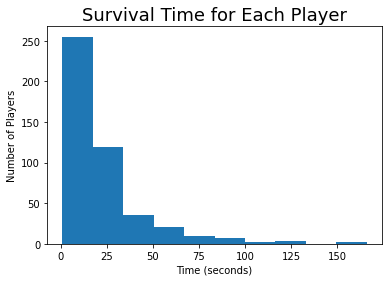

In [17]:
plt.hist(df1['time elapse'])
plt.xlabel("Time (seconds)")
plt.ylabel("Number of Players")
plt.title("Survival Time for Each Player",fontsize=18)

<AxesSubplot:title={'center':'Reasons of Termination'}, ylabel='level'>

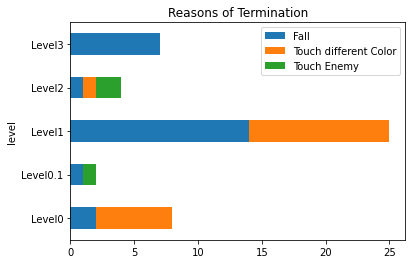

In [53]:
data=[]
for j in (['Level0', 'Level0.1', 'Level1', 'Level2', 'Level3']):
    level = df1[df1['level']==j]
    df3 = level[level['death reason'] != '']
    df4 = df3.groupby(['death reason']).size()
    dictionary=df4.to_dict()
    dictionary['level']=j
    data.append(dictionary)
deathReason = pd.DataFrame(data)
deathReason.plot(
    x = 'level',
    kind = 'barh',
    stacked = True,
    title = 'Reasons of Termination', #stacked bar chart
    mark_right = True)

In [56]:
deathReason.set_index('level')

,Fall,Touch different Color,Touch Enemy
level,,,
Level0,2,6.0,NaN
Level0.1,1,NaN,1.0
Level1,14,11.0,NaN
Level2,1,1.0,2.0
Level3,7,NaN,NaN


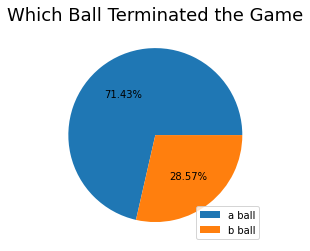

In [50]:
whoCausedDeath = df3['who caused death, 0 for left player, 1 for right, -1 none'].map({1: 'b ball', 0: 'a ball', -1: 'none'})
df3["who caused death, 0 for left player, 1 for right, -1 none"] = whoCausedDeath
df5 = df3.groupby(['who caused death, 0 for left player, 1 for right, -1 none']).size()
plt.title("Which Ball Terminated the Game",fontsize=18)
patches, text1, text2 = plt.pie(df5, autopct=lambda p: '{:.2f}%'.format(p,(p/100)*df5.sum()))
plt.legend(patches, df5.index, loc="lower right")
plt.show()

<AxesSubplot:title={'center':'Pass Rate'}, ylabel='level'>

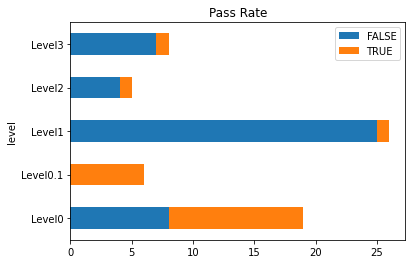

In [52]:
data=[]
for j in (['Level0', 'Level0.1', 'Level1', 'Level2', 'Level3']):
    level=df1[df1['level']==j]
    df2 = level.groupby(['true for pass level, false for died']).size()
    dictionary=df2.to_dict()
    dictionary['level']=j
    data.append(dictionary)
    
passRate = pd.DataFrame(data)
passRate.plot(
    x = 'level',
    kind = 'barh',
    stacked = True,
    title = 'Pass Rate', #stacked bar chart
    mark_right = True)